In [3]:
#Name: Domala Vamshikrishna
#Date:01-12-2021
#Model: XG Boosting
#station:41047
#Hyperparameter tuning using Randomsearch


In [4]:
import csv
import numpy as np
import folium
import pandas as pd
import math
from matplotlib import pyplot as plt

In [6]:
train = pd.read_excel("41047h_Training.xlsx")

In [7]:
corr=train.corr(method='pearson')
corr

,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,WTMP_deg,DEWP_deg
WDIR_deg,1.000000,-0.083495,-0.071898,-0.028022,-0.019392,0.001630,0.289847,-0.303824,0.009257,-0.029264,0.008476
WSPD_m/s,-0.083495,1.000000,0.987837,0.622174,0.005358,-0.066718,0.076161,-0.147054,-0.253535,-0.263866,-0.101170
GST_m/s,-0.071898,0.987837,1.000000,0.669209,0.035750,-0.008218,0.083799,-0.156283,-0.269234,-0.261829,-0.106855
WVHT_m,-0.028022,0.622174,0.669209,1.000000,0.399958,0.618020,0.052864,-0.199379,-0.345457,-0.296086,-0.216701
DPD_sec,-0.019392,0.005358,0.035750,0.399958,1.000000,0.677538,-0.246300,-0.059495,-0.166430,-0.136618,-0.189492
APD_sec,0.001630,-0.066718,-0.008218,0.618020,0.677538,1.000000,-0.117475,-0.091748,-0.223729,-0.157230,-0.223914
MWD_deg,0.289847,0.076161,0.083799,0.052864,-0.246300,-0.117475,1.000000,-0.122268,-0.019170,-0.014749,-0.012126
PRES_hpa,-0.303824,-0.147054,-0.156283,-0.199379,-0.059495,-0.091748,-0.122268,1.000000,-0.196204,-0.159511,-0.080103
ATMP_deg,0.009257,-0.253535,-0.269234,-0.345457,-0.166430,-0.223729,-0.019170,-0.196204,1.000000,0.919570,0.626586
WTMP_deg,-0.029264,-0.263866,-0.261829,-0.296086,-0.136618,-0.157230,-0.014749,-0.159511,0.919570,1.000000,0.560544


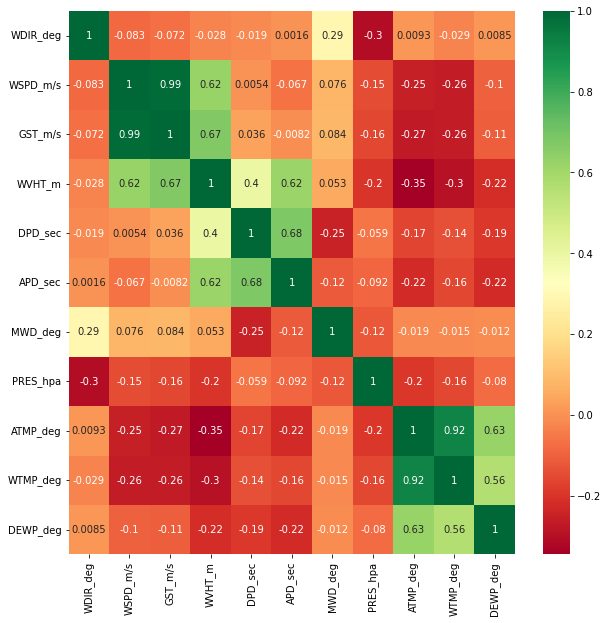

In [8]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
train.head()

,Date,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,WTMP_deg,DEWP_deg
0,2015-01-01 00:50:00,94,1.6,2.3,1.29,7.14,5.89,100,1022.2,23.8,25.4,19.9
1,2015-01-01 01:50:00,168,0.1,0.4,1.22,8.33,5.96,11,1022.4,23.9,25.4,19.6
2,2015-01-01 02:50:00,215,2.3,2.9,1.44,8.33,6.38,355,1022.2,23.7,25.4,20.0
3,2015-01-01 03:50:00,294,2.9,3.7,1.58,8.33,6.51,12,1022.3,23.8,25.4,19.0
4,2015-01-01 04:50:00,349,7.8,8.9,1.65,9.09,6.77,349,1021.9,21.9,25.3,19.6


In [11]:
Xtrain = train.iloc[:,[2,4,5]]
ytrain = train.iloc[:,3]

In [12]:
import xgboost as xgb
greg=xgb.XGBRegressor()

In [13]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
random_grid=[{'learning_rate':[0.001,0.01,0.1,1], 
              'n_estimators':[1000,2000,4000,8000],
              'colsample_bytree': np.arange(0.1,1.0,0.1), 
              'colsample_bylevel': np.arange(0.2, 1.0, 0.1),
              'max_depth':[2,6,12,18,25],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}]

In [14]:
random_search=RandomizedSearchCV(greg, random_grid, scoring='neg_mean_squared_error', verbose=1 )


In [15]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [16]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search=random_search.fit(Xtrain,ytrain.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Time taken: 0 hours 10 minutes and 59.01 seconds.


In [17]:
print("best parameters",random_search.best_params_)
print("lowesr RMSE: ", (-random_search.best_score_)**(1/2.0))

best parameters {'subsample': 0.8999999999999999, 'reg_lambda': 0.2, 'reg_alpha': 6.4, 'n_estimators': 8000, 'max_depth': 2, 'learning_rate': 1, 'colsample_bytree': 0.30000000000000004, 'colsample_bylevel': 0.5000000000000001}
lowesr RMSE:  0.4988779046443646


In [18]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [19]:
display(random_search)

Best parameters are: {'subsample': 0.8999999999999999, 'reg_lambda': 0.2, 'reg_alpha': 6.4, 'n_estimators': 8000, 'max_depth': 2, 'learning_rate': 1, 'colsample_bytree': 0.30000000000000004, 'colsample_bylevel': 0.5000000000000001}


-0.259 + or -0.062 for the {'subsample': 0.7, 'reg_lambda': 0.8, 'reg_alpha': 12.8, 'n_estimators': 4000, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7000000000000002}
-12.457 + or -1.823 for the {'subsample': 0.5, 'reg_lambda': 200, 'reg_alpha': 3.2, 'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.001, 'colsample_bytree': 0.30000000000000004, 'colsample_bylevel': 0.2}
-12.009 + or -1.73 for the {'subsample': 0.8999999999999999, 'reg_lambda': 200, 'reg_alpha': 51.2, 'n_estimators': 1000, 'max_depth': 18, 'learning_rate': 0.001, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.9000000000000001}
-0.249 + or -0.04 for the {'subsample': 0.8999999999999999, 'reg_lambda': 0.2, 'reg_alpha': 6.4, 'n_estimators': 80

In [20]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5000000000000001, colsample_bynode=1,
             colsample_bytree=0.30000000000000004, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=8000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=6.4, reg_lambda=0.2, scale_pos_weight=1,
             subsample=0.8999999999999999, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [21]:
import xgboost as xgb

greg=xgb.XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5, colsample_bynode=1,
             colsample_bytree=0.3, enable_categorical=False, gamma=0, gpu_id=-1,
             importance_type=None,learning_rate=1, max_delta_step=0, max_depth=2,
             min_child_weight=1,n_estimators=8000, n_jobs=16, num_parallel_tree=1,
             predictor='auto', random_state=0, reg_alpha=6.4, reg_lambda=0.2,
             scale_pos_weight=1, subsample=0.9, tree_method='exact',
             validate_parameters=1, verbosity=None)
greg.fit(Xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=8000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=6.4, reg_lambda=0.2, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
y_pred = greg.predict(Xtrain)

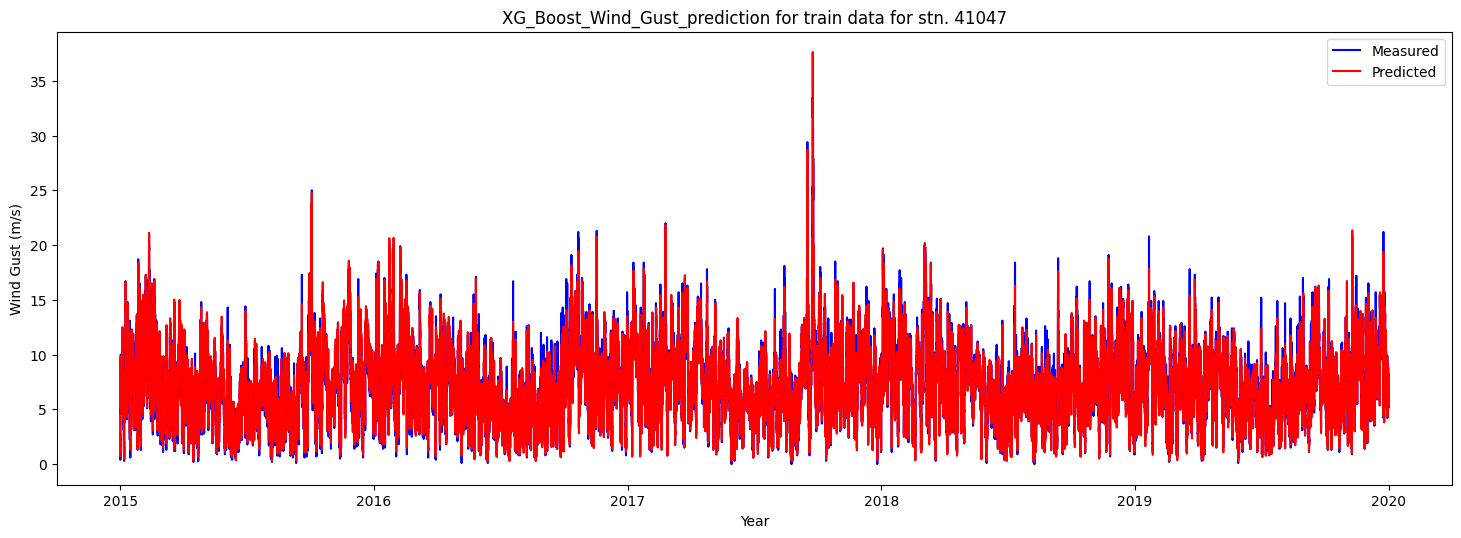

In [23]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(train['Date'], ytrain.ravel(), label='Measured', color='blue')
plt.plot(train['Date'],y_pred, label='Predicted', color='red')
#plt.plot(y_pred, color='green', label='predicted')
plt.title('XG_Boost_Wind_Gust_prediction for train data for stn. 41047')
plt.xlabel('Year')
plt.ylabel('Wind Gust (m/s)')
plt.legend(loc='upper right')

In [24]:
from sklearn.metrics import r2_score
r2_score(ytrain,y_pred)

0.9816332672913927

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,y_pred))

0.4466747124717044

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytrain,y_pred)

143252151623.17615

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytrain,y_pred)

0.3079405134178592

In [28]:
test=pd.read_excel("41047h_Testing.xlsx")

In [29]:
test

,Date,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,WTMP_deg,DEWP_deg
0,2020-01-01 00:40:00,193,8.1,9.7,1.18,8.33,5.16,134,1015.5,23.7,23.4,18.3
1,2020-01-01 01:40:00,250,7.8,9.8,1.20,7.69,4.83,142,1016.5,23.7,23.4,18.3
2,2020-01-01 02:40:00,5,1.0,2.4,1.17,7.69,4.95,137,1016.6,23.7,23.4,18.3
3,2020-01-01 03:40:00,254,4.6,5.5,1.19,14.81,4.99,74,1016.2,23.7,23.4,18.3
4,2020-01-01 04:40:00,218,4.6,5.6,1.18,4.17,4.86,261,1015.7,23.7,23.4,18.3
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:40:00,193,7.1,9.5,2.21,7.69,6.35,84,1024.9,22.8,22.8,14.4
8780,2020-12-31 20:40:00,193,7.2,9.5,2.17,11.43,6.48,82,1025.5,22.8,22.8,14.2
8781,2020-12-31 21:40:00,193,7.5,9.2,2.04,9.09,6.17,41,1025.7,22.8,22.8,14.2
8782,2020-12-31 22:40:00,193,7.5,10.1,2.06,7.14,6.25,92,1025.8,22.9,22.8,14.1


In [30]:
Xtest=test.iloc[:,[2,4,5]]

In [31]:
Xtest

,WSPD_m/s,WVHT_m,DPD_sec
0,8.1,1.18,8.33
1,7.8,1.20,7.69
2,1.0,1.17,7.69
3,4.6,1.19,14.81
4,4.6,1.18,4.17
...,...,...,...
8779,7.1,2.21,7.69
8780,7.2,2.17,11.43
8781,7.5,2.04,9.09
8782,7.5,2.06,7.14


In [32]:
ytest=test.iloc[:,[3]]

In [33]:
ytest

,GST_m/s
0,9.7
1,9.8
2,2.4
3,5.5
4,5.6
...,...
8779,9.5
8780,9.5
8781,9.2
8782,10.1


In [34]:
ytest_pred=greg.predict(Xtest)

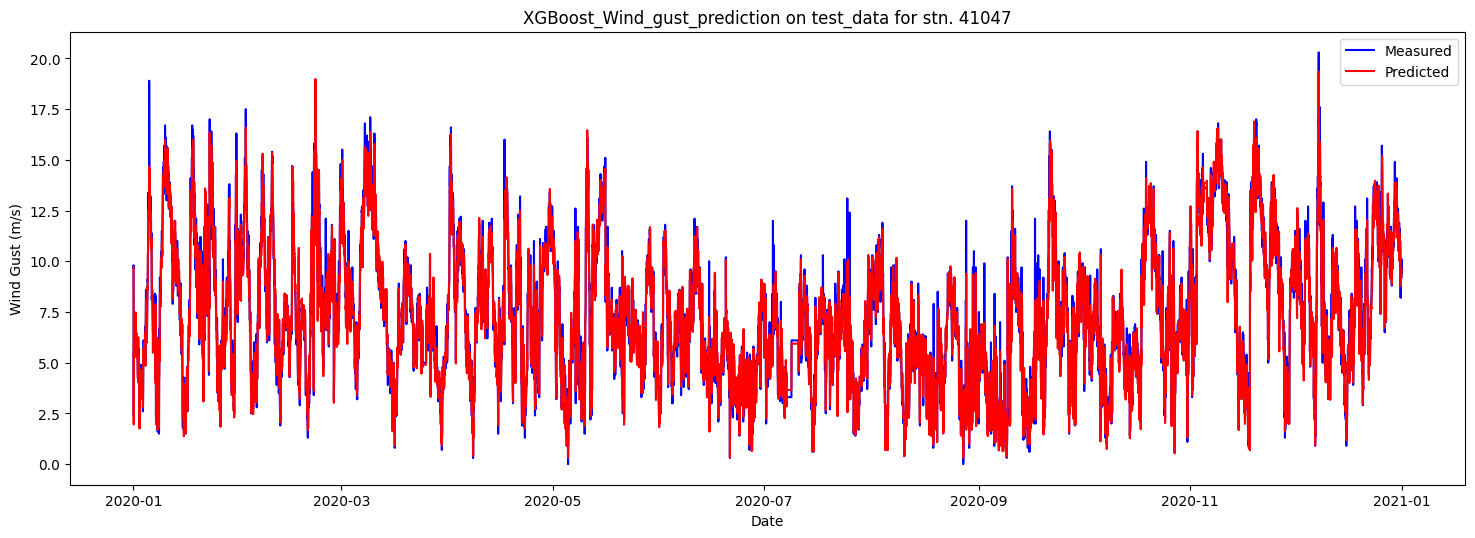

In [35]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(test['Date'], ytest, label='Measured', color='blue')
plt.plot(test['Date'],ytest_pred, label='Predicted', color='red')


plt.title('XGBoost_Wind_gust_prediction on test_data for stn. 41047')
plt.xlabel('Date')
plt.ylabel('Wind Gust (m/s)')
plt.legend(loc='upper right')

In [36]:
from sklearn.metrics import r2_score
r2_score(ytest,ytest_pred)

0.9832508354851801

In [37]:
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ytest_pred)

0.18470605852816063

In [38]:
math.sqrt(mean_squared_error(ytest,ytest_pred))

0.42977442749442485

In [39]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytest,ytest_pred)

333507110639.72394

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ytest_pred)

0.2824291289585536

In [60]:
ytest_pred=pd.DataFrame(ytest_pred)

In [48]:
ytest_pred

,0
0,1.402747
1,1.312154
2,0.970782
3,0.799396
4,1.164588
...,...
8779,2.195354
8780,1.992086
8781,1.984485
8782,2.212198


In [49]:
df1=pd.read_excel("ytest_pred_gb_ran_search.xlsx")

In [50]:
df1

,Date,ytest_pred
0,2020-01-01 00:40:00,1.402747
1,2020-01-01 01:40:00,1.312154
2,2020-01-01 02:40:00,0.970782
3,2020-01-01 03:40:00,0.799396
4,2020-01-01 04:40:00,1.164588
...,...,...
8779,2020-12-31 19:40:00,2.195354
8780,2020-12-31 20:40:00,1.992086
8781,2020-12-31 21:40:00,1.984485
8782,2020-12-31 22:40:00,2.212198
